In [36]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load datasets
gossipcop_fake = pd.read_csv('/content/gossipcop_fake.csv')
gossipcop_real = pd.read_csv('/content/gossipcop_real.csv')
politifact_fake=pd.read_csv('/content/politifact_fake.csv')
politifact_real = pd.read_csv('/content/politifact_fake.csv')



In [2]:
gossipcop_fake['label'] = 'fake'
gossipcop_real['label'] = 'real'
politifact_real['label'] = 'real'
politifact_fake['label'] = 'fake'
# Ensure consistent column names and combine
datasets = [gossipcop_fake, gossipcop_real, politifact_real,politifact_real]
data = pd.concat(datasets, ignore_index=True)


In [3]:
data.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,fake
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,fake
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,fake
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,fake
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,fake


In [4]:
data_cleaned = data.drop_duplicates()


In [5]:
data_cleaned.duplicated().sum()

0

In [7]:
data_cleaned['popularity'] = data_cleaned['tweet_ids'].apply(lambda x: len(str(x).split('\t')))


<ipython-input-7-0aa090287018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['popularity'] = data_cleaned['tweet_ids'].apply(lambda x: len(str(x).split('\t')))


In [8]:
data_cleaned['popularity'].head()

,popularity
0,97
1,15
2,86
3,14
4,66


In [37]:
print("Top 10 Most Popular News Articles:")
print(top_10_news[['id', 'title', 'news_url', 'popularity', 'label']])

Top 10 Most Popular News Articles:
                         id  \
22199       politifact14548   
22553       politifact14667   
22187       politifact13949   
22216       politifact13905   
22169       politifact14742   
22449       politifact14920   
18     gossipcop-2365780434   
3098    gossipcop-922305481   
22376       politifact14771   
13955      gossipcop-955433   

                                                   title  \
22199                            The Legislative Process   
22553                                    Wake Up America   
22187                                        Neon Nettle   
22216  SPECIAL REPORT: GEORGIA BECOMES FIRST STATE TO...   
22169                         Snapchat is shutting down!   
22449                 eCFR — Code of Federal Regulations   
18                               Justin Bieber Despacito   
3098                                        Pretty Woman   
22376  Civil War Erupts In Sweden as Irate Swedes Bur...   
13955      Nick Jonas a

<ipython-input-14-1f5f62e2900b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='title', data=top_10_news, palette="viridis")


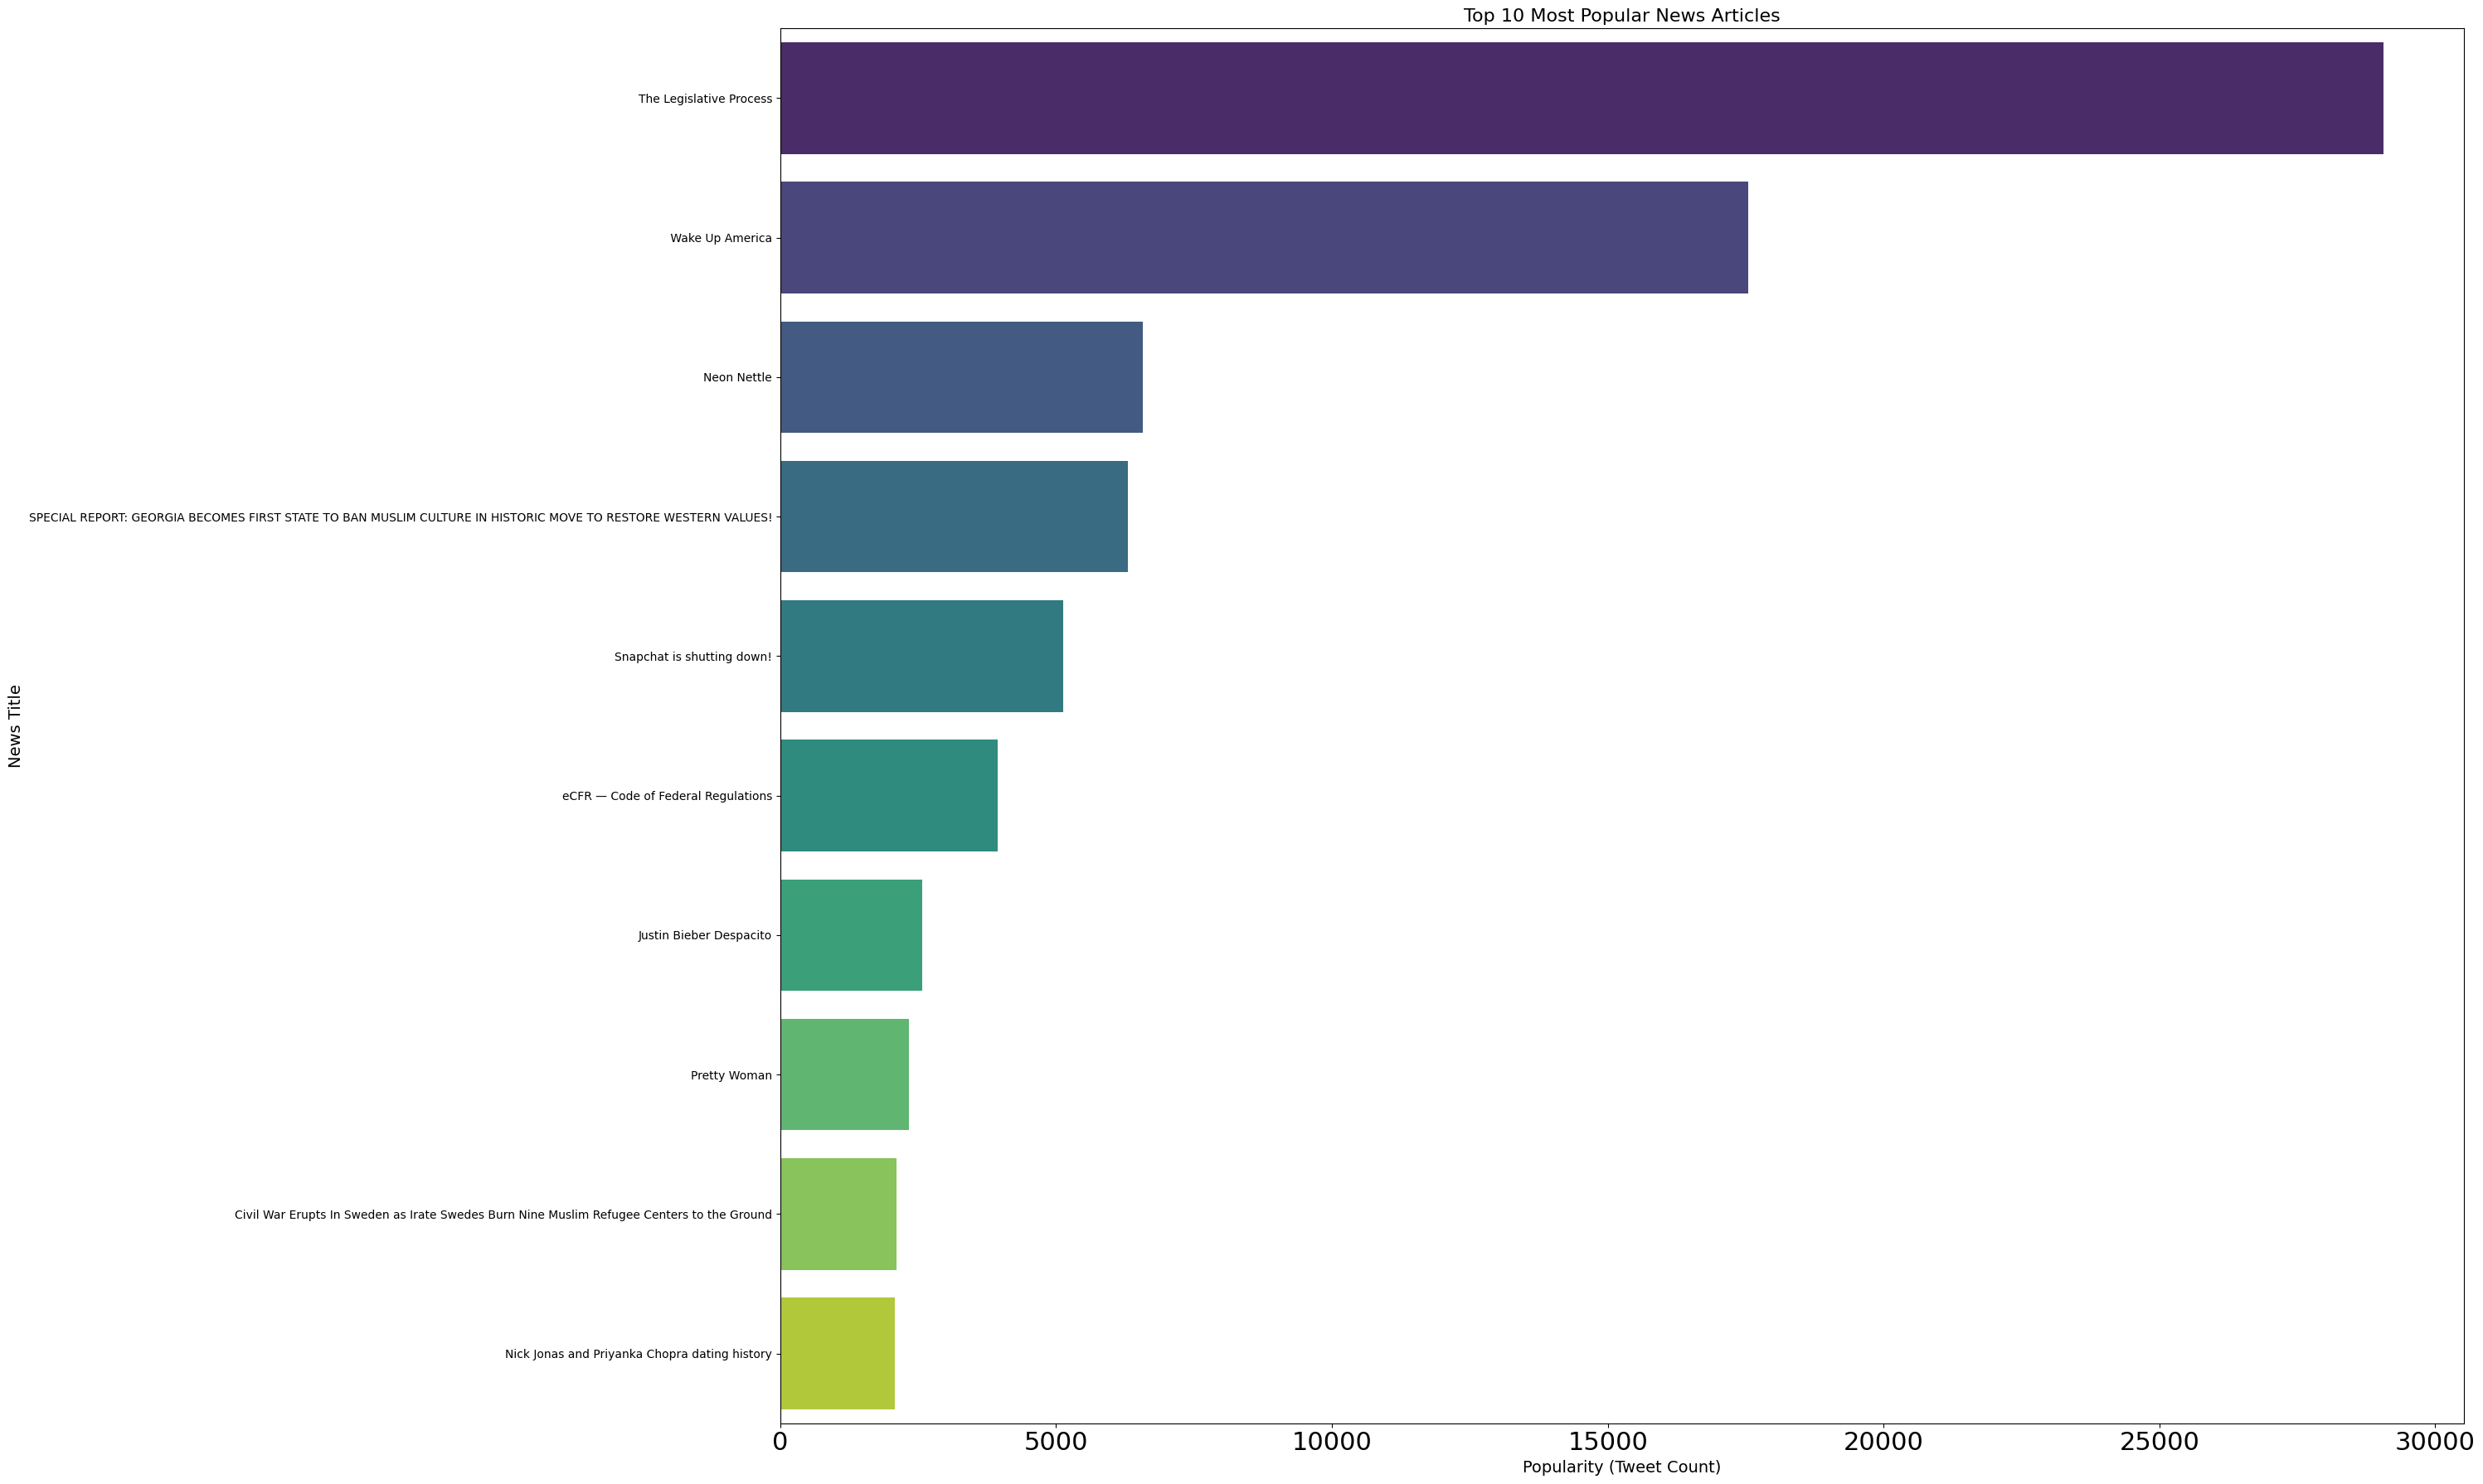

In [14]:
plt.figure(figsize=(30, 18))  # Adjust figure size for better readability
sns.barplot(x='popularity', y='title', data=top_10_news, palette="viridis")

# Enhance the visualization
plt.title("Top 10 Most Popular News Articles", fontsize=16)
plt.xlabel("Popularity (Tweet Count)", fontsize=14)
plt.ylabel("News Title", fontsize=14)
plt.xticks(fontsize=22)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


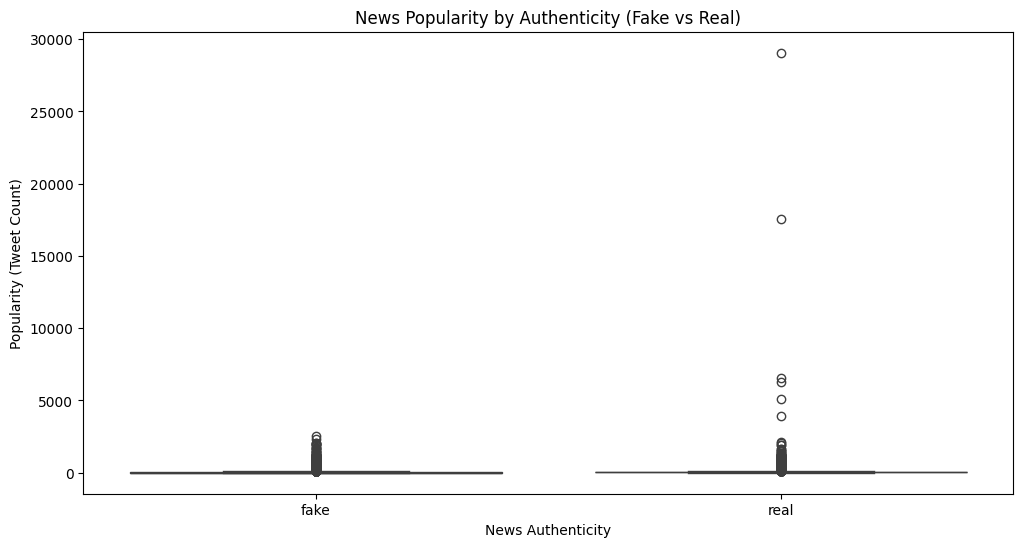

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the popularity distribution between fake and real news
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='popularity', data=data_cleaned)
plt.title("News Popularity by Authenticity (Fake vs Real)")
plt.xlabel("News Authenticity")
plt.ylabel("Popularity (Tweet Count)")
plt.show()


In [28]:
from scipy import stats

# Encode labels as 0 (fake) and 1 (real)
data['label_encoded'] = data_cleaned['label'].apply(lambda x: 1 if x == 'real' else 0)

# T-test between fake and real news based on popularity
real_news_popularity = data_cleaned[data_cleaned['label_encoded'] == 1]['popularity']
fake_news_popularity = data_cleaned[data_cleaned['label_encoded'] == 0]['popularity']

t_stat, p_value = stats.ttest_ind(real_news_popularity, fake_news_popularity)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -11.509130782738373, P-value: 1.4443634540348527e-30


In [31]:
# Compute Point-Biserial correlation (correlation between binary label and popularity)
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(data_cleaned['label_encoded'], data_cleaned['popularity'])

print(f"Point-Biserial Correlation: {correlation}, P-value: {p_value}")


Point-Biserial Correlation: -0.0763846450222901, P-value: 1.444363454034873e-30


In [24]:
# Point-Biserial Correlation: -0.076
# The correlation value is negative, indicating a very weak inverse relationship between news popularity (tweet count) and the authenticity of the news (fake vs real).
# The correlation is close to zero, which suggests that the popularity of news (in terms of tweet counts) is not strongly associated with whether the news is real or fake.

In [26]:
# P-value: 1.44e-30
# The p-value is extremely small, indicating that the observed correlation is statistically significant.
# This means that the weak negative correlation between popularity and news authenticity is unlikely to be due to random chance.

In [34]:
from scipy.stats import spearmanr

# Encode labels as ordinal: 'real' -> 1, 'fake' -> 0
data_cleaned['label_encoded'] = data_cleaned['label'].apply(lambda x: 1 if x == 'real' else 0)

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(data_cleaned['popularity'], data_cleaned['label_encoded'])

print(f"Spearman's Rank Correlation: {correlation}")
print(f"P-value: {p_value}")


Spearman's Rank Correlation: 0.19915919372519647
P-value: 1.1734426982494997e-200


<ipython-input-34-c5a6e6585fc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['label_encoded'] = data_cleaned['label'].apply(lambda x: 1 if x == 'real' else 0)


In [35]:
# Spearman's Rank Correlation: 0.199

# This indicates a weak positive correlation between news popularity (measured by tweet count) and the authenticity of the news (whether it is fake or real). The value is closer to 0, which suggests a very weak association.
# The positive sign implies that there is a slight trend where more popular news tends to be real rather than fake. However, the strength of this trend is not strong enough to be meaningful.
# P-value: 1.17

# The extremely low p-value indicates that the correlation is highly statistically significant, meaning the relationship (no matter how weak) between news authenticity and popularity is unlikely to be due to random chance.
# The significant p-value suggests that despite the weak correlation, the association is real in the dataset, though not substantial.